## 今天的範例，帶大家運用python 裡面的套件
* 如何模擬這些分配的樣本點
* 進行一些機率的運算

包含以下離散型分配        

1. 均勻分配( Uniform Distribution )     
2. 常態分配( Normal Distribution )   

並透過模擬來學習中央極限定理，   
由實際觀察，看其他分配怎麼變成常態分配的過程。   


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns

## 1.連續均勻分配
* [scipy.stats教學](https://www.yiibai.com/scipy/scipy_stats.html)
* [stats.uniform 相關用法](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)    
stats.uniform 中的  loc 和 scale,組成 uniform 分配的上下界    
low=loc   
high=loc+scale   

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[0.   0.   0.   0.   0.   0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]


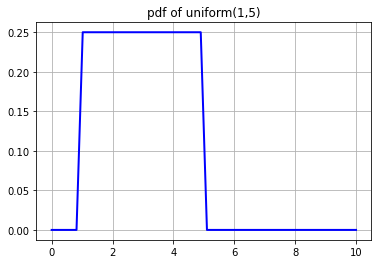

'下圖可知1~5的範圍，是有機率的，大於或小於範圍（[1~5]）的機率都是0'

In [27]:
# Python實現連續均勻分配
# 1.設定使用參數
"""在1~5區間中x連續隨機變量出現的機率為"""
low=1
high=5
x=np.linspace(0, 10, 50)
print(x)
# 2. 產生 pdf
y = stats.uniform.pdf(x,low, high-low)
print(y)
"""x的範圍是1~10，但出現的範圍是1~5，所以小於ㄅ或大於5出現的機率為0"""
plt.plot(x, y, "b-", linewidth=2)
plt.grid(True)
plt.title('pdf of uniform(1,5)')
plt.show()
"""下圖可知1~5的範圍，是有機率的，大於或小於範圍（[1~5]）的機率都是0"""

![](data.PNG)

[0.         0.         0.         0.         0.         0.00510204
 0.05612245 0.10714286 0.15816327 0.20918367 0.26020408 0.31122449
 0.3622449  0.41326531 0.46428571 0.51530612 0.56632653 0.61734694
 0.66836735 0.71938776 0.77040816 0.82142857 0.87244898 0.92346939
 0.9744898  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


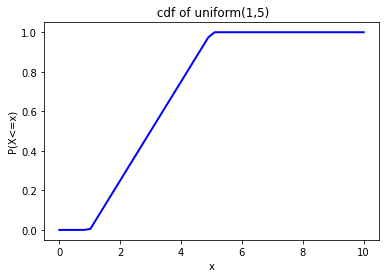

In [32]:
# 3.計算離散均勻分配的累積機率 (cumulative density function)，pdf 的積分
cumsum_probs =  stats.uniform.cdf(x,low, high-low)
print(cumsum_probs)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title(' cdf of uniform(1,5)')
plt.plot(x, cumsum_probs,"b-", linewidth=2)
plt.show()
#print(cumsum_probs)

In [ ]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
k = stats.uniform.ppf(cumsum_probs , low, high)
print(k)
#看上圖看結果

[1.         1.         1.         1.         1.         1.0255102
 1.28061224 1.53571429 1.79081633 2.04591837 2.30102041 2.55612245
 2.81122449 3.06632653 3.32142857 3.57653061 3.83163265 4.08673469
 4.34183673 4.59693878 4.85204082 5.10714286 5.3622449  5.61734694
 5.87244898 6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.        ]


[1.24431579 4.9326299  2.92450831 3.99690226 3.61690244 2.89554078
 2.55485768 3.79512963 2.98005807 1.18696512 4.58204401 1.18158985
 1.95467597 3.8339763  3.39766463 2.91041356 1.7064933  1.21481736
 1.17859768 4.14385621]


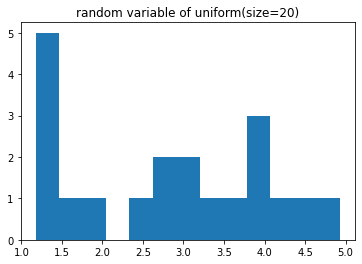

In [12]:
# 5.產生符合隨機樣本點 (random sample)
X = stats.uniform.rvs(low, high-low,size=20)
print(X)
plt.hist(X,bins=13)
plt.title('random variable of uniform(size=20)')
plt.show()
#試試看，，每一次的結果一樣嗎?

In [ ]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_uniform=stats.uniform.stats(low, high-low,moments='mvks')
print(stat_uniform)
print(type(stat_uniform))
print("randint mean=",float(stat_uniform[0]))
print("randint variance=",float(stat_uniform[1]))
print("randint kurtosis=",float(stat_uniform[2]))
print("randint skew=",float(stat_uniform[3]))

(array(3.), array(1.33333333), array(0.), array(-1.2))
<class 'tuple'>
randint mean= 3.0
randint variance= 1.3333333333333333
randint kurtosis= 0.0
randint skew= -1.2


## 常態分配
* [stats.norm 相關用法](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)    
stats.norm 中的  loc,scale 分別代表   
loc=mu      
scale=sigma     

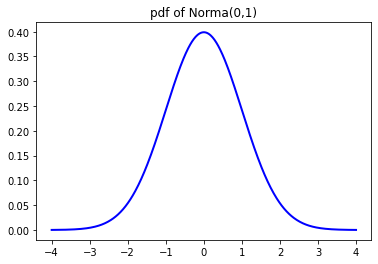

In [15]:
# Python實現常態分配
#1.設定使用參數
mu=0 #母體平均數
sigma=1#標準差
x=np.linspace(-4, 4, 500)
#print(x)
# 2.產生 pdf圖
y = stats.norm.pdf(x,mu, sigma)
plt.plot(x, y, "b-", linewidth=2)
#plt.grid(True)
plt.title('pdf of Norma(0,1)')
plt.show()

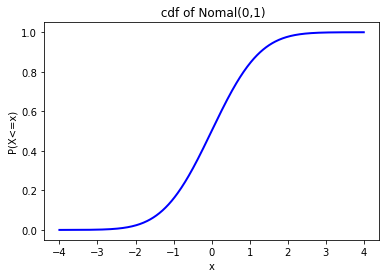

6.159755045951987e-05


In [ ]:
# 3.計算常態分配的累積機率 (cumulative density function)，pdf 的積分
cumsum_probs =  stats.norm.cdf(x,mu, sigma)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title(' cdf of Nomal(0,1)')
plt.plot(x, cumsum_probs,"b-", linewidth=2)
plt.show()
print(cumsum_probs[10])

In [ ]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
k = stats.norm.ppf(cumsum_probs ,mu, sigma)
print(k[1:10])
#看上圖比對結果

[-3.98396794 -3.96793587 -3.95190381 -3.93587174 -3.91983968 -3.90380762
 -3.88777555 -3.87174349 -3.85571142]


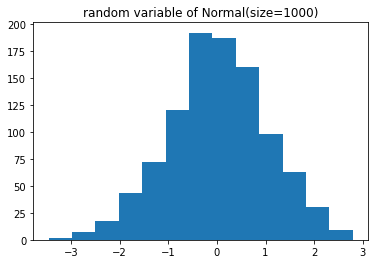

In [ ]:
# 5.產生符合隨機樣本點 (random sample)
X = stats.norm.rvs(mu, sigma,size=1000)
plt.hist(X,bins=13)
plt.title('random variable of Normal(size=1000)')
plt.show()
#試試看，，每一次的結果一樣嗎?

In [16]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_norm=stats.norm.stats(mu, sigma,moments='mvks')
print(stat_norm)
print(type(stat_norm))
print("normal mean=",float(stat_norm[0]))
print("normal variance=",float(stat_norm[1]))
print("normal kurtosis=",float(stat_norm[2]))
print("normal skew=",float(stat_norm[3]))
#所以可以看到標準常態分配的峰度和偏度為0

(array(0.), array(1.), array(0.), array(0.))
<class 'tuple'>
normal mean= 0.0
normal variance= 1.0
normal kurtosis= 0.0
normal skew= 0.0


## 用模擬驗證中央極限定理

In [17]:
# 計算樣本平均數
def cal_mean(x):
     return(sum(x)/len(x))


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


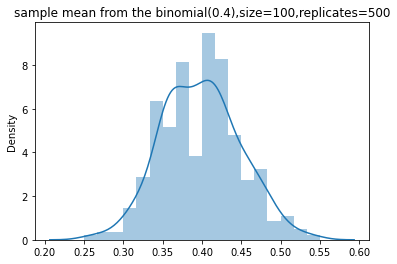

In [22]:
#模擬重複抽樣 500次，看樣本平均(n=100)的分布情形
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=100)#產出100個樣本 >> 0.4=1,0.6=0
    
    mean_rv.append(cal_mean(X))
#print(mean_rv)
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


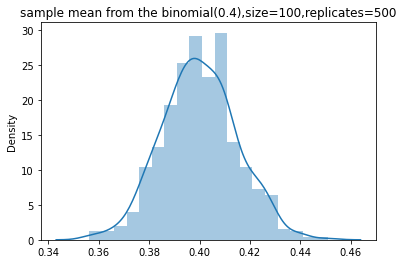

In [25]:
#模擬重複抽樣 500次，看樣本平均(n=1000)的分布情形
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=1000)
    #print(X)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


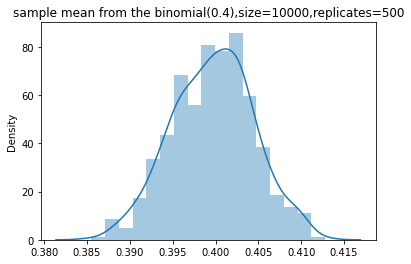

In [33]:
#模擬重複抽樣 500次，看樣本平均(n=10000)的分布情形
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=10000)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=10000,replicates=500')
plt.show()

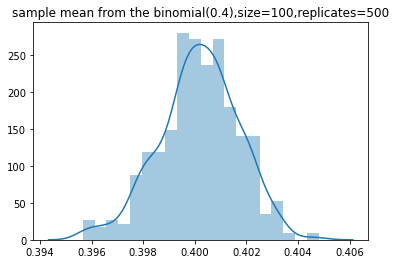

In [ ]:
#模擬重複抽樣 500次，看樣本平均(n=100000)的分布情形
p=0.4
mean_rv=[]
for i in range(500):
    X = stats.bernoulli.rvs(p,size=100000)
    mean_rv.append(cal_mean(X))
sns.distplot(mean_rv)
plt.title('sample mean from the binomial(0.4),size=100,replicates=500')
plt.show()